In [37]:
import pandas as pd
from sqlalchemy import create_engine
import os, sys
from dotenv import load_dotenv
import urllib.parse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from scipy import stats
from data_preprocessing import CleanTelco
from ploter import PlotDataFrame

In [10]:
# Load environment variables from .env
load_dotenv()
# Get PostgreSQL credentials from environment variables
username = os.getenv("POSTGRES_USERNAME")
password = os.getenv("POSTGRES_PASSWORD")
host = os.getenv("POSTGRES_HOST")
database_name = os.getenv("POSTGRES_DATABASE")
# Encode the password if needed
encoded_password = urllib.parse.quote(password)
# Create the database URL
database_url = f"postgresql://{username}:{encoded_password}@{host}/{database_name}"
# Create the engine using the database URL
engine = create_engine(database_url)

In [38]:
#Initialize CleanTelco instance
df_cleaner = CleanTelco()
pltotter = PlotDataFrame()

# Define the SQL query to retrieve the data from the database
query = "SELECT * FROM xdr_data"

# Load the data into a pandas DataFrame
df = pd.read_sql(query, engine)

# Example of EDA
df.head(10) # Display the first few rows of the DataFrame

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [13]:
missing_df = df_cleaner.get_missing_values(df)
missing_df

2024-04-27 12:36:27,369:logger:Get missing values


,column_name,percent_missing
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000


In [14]:
columns_remove_missing = missing_df[missing_df['percent_missing'] >= 30].index.tolist()
columns_remove_missing

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [15]:
columns_remove_missing = [col for col in columns_remove_missing if col not in ['TCP UL Retrans. Vol (Bytes)',
    'TCP DL Retrans. Vol (Bytes)']]
columns_remove_missing

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [16]:
df_clean = df.drop(columns_remove_missing, axis=1)
df_clean.shape

(150001, 47)

In [18]:
missing_df = df_cleaner.get_missing_values(df_clean)
missing_df

2024-04-27 12:44:58,040:logger:Get missing values


,column_name,percent_missing
Google UL (Bytes),Google UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Google DL (Bytes),Google DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000


In [19]:
#Since the TCP variables has high percentage of missing values, we can not impute them with median or mean which means making the majority values
# equal to a single value because our data will be heavily biased. So the right way is to use forward fill technique or backward fill technique.
# We will use backward fill technique 
df_cleaner.fix_missing_bfill(df_clean, 'TCP DL Retrans. Vol (Bytes)')
df_cleaner.fix_missing_bfill(df_clean, 'TCP UL Retrans. Vol (Bytes)')

/home/getachew/Documents/10 Academy/Cohort B/Week 1/User Analytics in the Telecommunication Industry/scripts/data_preprocessing.py:93: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col_name] = df[col_name].fillna(method='bfill')
2024-04-27 12:46:28,708:logger:bfill fix missing
2024-04-27 12:46:28,714:logger:bfill fix missing


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [20]:
# Calculate and print the skewness for 'Avg RTT DL (ms)'
avg_rtt_dl_skewness = df_clean['Avg RTT DL (ms)'].skew(skipna=True)
print(f"Avg RTT DL (ms) Skewness: {avg_rtt_dl_skewness}")

# Calculate and print the skewness for 'Avg RTT UL (ms)'
avg_rtt_ul_skewness = df_clean['Avg RTT UL (ms)'].skew(skipna=True)
print(f"Avg RTT UL (ms) Skewness: {avg_rtt_ul_skewness}")

Avg RTT DL (ms) Skewness: 62.907828079959614
Avg RTT UL (ms) Skewness: 28.457414585463813


In [21]:
# Forward-fill missing values for 'Avg RTT DL (ms)'
df_cleaner.fix_missing_ffill(df_clean, 'Avg RTT DL (ms)')

# Forward-fill missing values for 'Avg RTT UL (ms)'
df_cleaner.fix_missing_ffill(df_clean, 'Avg RTT UL (ms)')

/home/getachew/Documents/10 Academy/Cohort B/Week 1/User Analytics in the Telecommunication Industry/scripts/data_preprocessing.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col_name] = df[col_name].fillna(method='ffill')
2024-04-27 12:47:45,151:logger:ffil fix missing
2024-04-27 12:47:45,153:logger:ffil fix missing


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [22]:
# Get a DataFrame with information about missing values
missing_df = df_cleaner.get_missing_values(df_clean)

# Display the DataFrame
missing_df

2024-04-27 12:48:37,842:logger:Get missing values


,column_name,percent_missing
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Avg RTT UL (ms),Avg RTT UL (ms),0.000000
Avg RTT DL (ms),Avg RTT DL (ms),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Social Media DL (Bytes),Social Media DL (Bytes),0.000000
Social Media UL (Bytes),Social Media UL (Bytes),0.000000


In [23]:
#Dropping rows having missing values since they are small, they won't affect the data frame
#generally acceptable to remove rows with missing values, especially if the missing percentage is very small. 

df_clean.dropna(inplace=True)
# Get a DataFrame with information about missing values
missing_df = df_cleaner.get_missing_values(df_clean)

# Display the DataFrame
missing_df

2024-04-27 12:53:37,608:logger:Get missing values


,column_name,percent_missing
Bearer Id,Bearer Id,0.0
Activity Duration UL (ms),Activity Duration UL (ms),0.0
Dur. (ms).1,Dur. (ms).1,0.0
Handset Manufacturer,Handset Manufacturer,0.0
Handset Type,Handset Type,0.0
Nb of sec with Vol DL < 6250B,Nb of sec with Vol DL < 6250B,0.0
Nb of sec with Vol UL < 1250B,Nb of sec with Vol UL < 1250B,0.0
Social Media DL (Bytes),Social Media DL (Bytes),0.0
Social Media UL (Bytes),Social Media UL (Bytes),0.0
Google DL (Bytes),Google DL (Bytes),0.0


In [24]:
df_clean.shape

(146887, 47)

In [25]:
df_clean.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [26]:
# We can see that columns 'Start' and 'End" can be converted to pandas datetime
df_clean = df_cleaner.convert_to_datetime(df_clean, 'Start')
df_clean = df_cleaner.convert_to_datetime(df_clean, 'End')

2024-04-27 12:56:55,900:logger:Converted to datetime
2024-04-27 12:56:55,973:logger:Converted to datetime


In [27]:
df_clean = df_cleaner.convert_to_integer(df_clean, 'Bearer Id')
df_clean = df_cleaner.convert_to_integer(df_clean, 'IMSI')
df_clean = df_cleaner.convert_to_integer(df_clean, 'IMEI')
df_clean = df_cleaner.convert_to_integer(df_clean, 'MSISDN/Number')

2024-04-27 12:57:40,419:logger:Converted to integer
2024-04-27 12:57:40,421:logger:Converted to integer
2024-04-27 12:57:40,422:logger:Converted to integer
2024-04-27 12:57:40,424:logger:Converted to integer


In [28]:
df_clean

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,-9223372036854775808,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,-9223372036854775808,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,-9223372036854775808,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,-9223372036854775808,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,-9223372036854775808,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7349883264234529792,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,61661.0,208201716588303,33762146363,35860607430880,D10033B,...,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,-9223372036854775808,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,84940.0,208201402149148,33761274518,35327007109396,D78058B,...,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,808482329.0,12135519.0,45923464.0,70341448.0
149993,-9223372036854775808,2019-04-29 07:28:00,79.0,2019-04-30 18:22:00,512.0,125622.0,208201402072093,33626114091,35735309473406,D73542B,...,18144703.0,8161828.0,20559422.0,20415237.0,569668054.0,1618788.0,168292600.0,11056036.0,43629118.0,623318363.0
149994,-9223372036854775808,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,113545.0,208200313074099,33645655643,35155409288696,T88383B,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0


In [29]:
df_clean = df_cleaner.convert_to_string(df_clean, 'Last Location Name')
df_clean = df_cleaner.convert_to_string(df_clean, 'Handset Manufacturer')
df_clean = df_cleaner.convert_to_string(df_clean, 'Handset Type')

2024-04-27 12:58:34,872:logger:Converted to string
2024-04-27 12:58:34,895:logger:Converted to string
2024-04-27 12:58:34,908:logger:Converted to string


In [30]:
df_clean.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                string[python]
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [31]:
df_clean = df_cleaner.drop_duplicate(df_clean)
df_clean.shape

2024-04-27 12:59:21,761:logger:Dropped duplicates


(146887, 47)

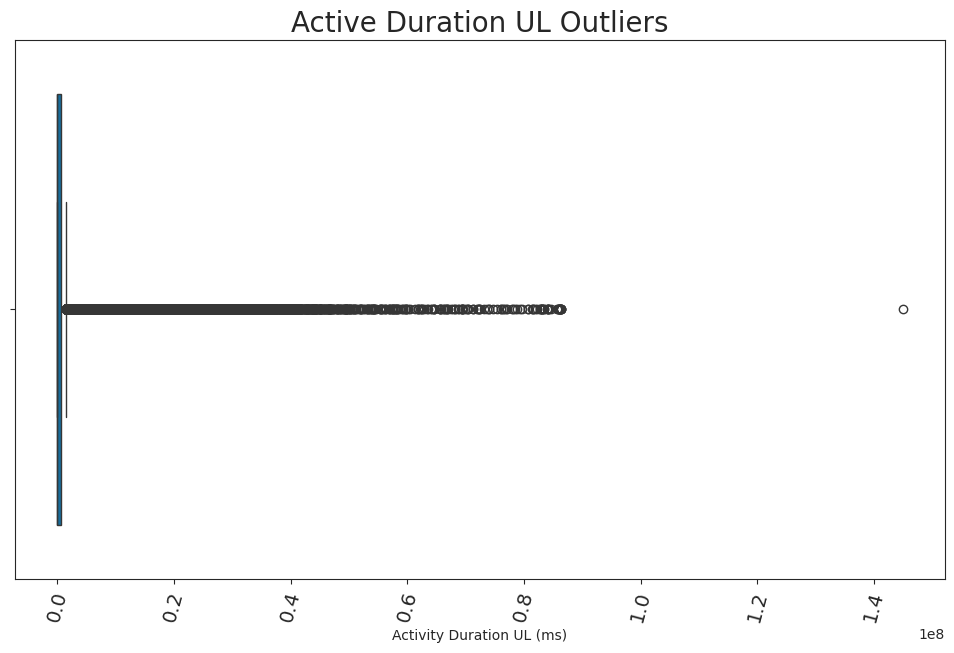

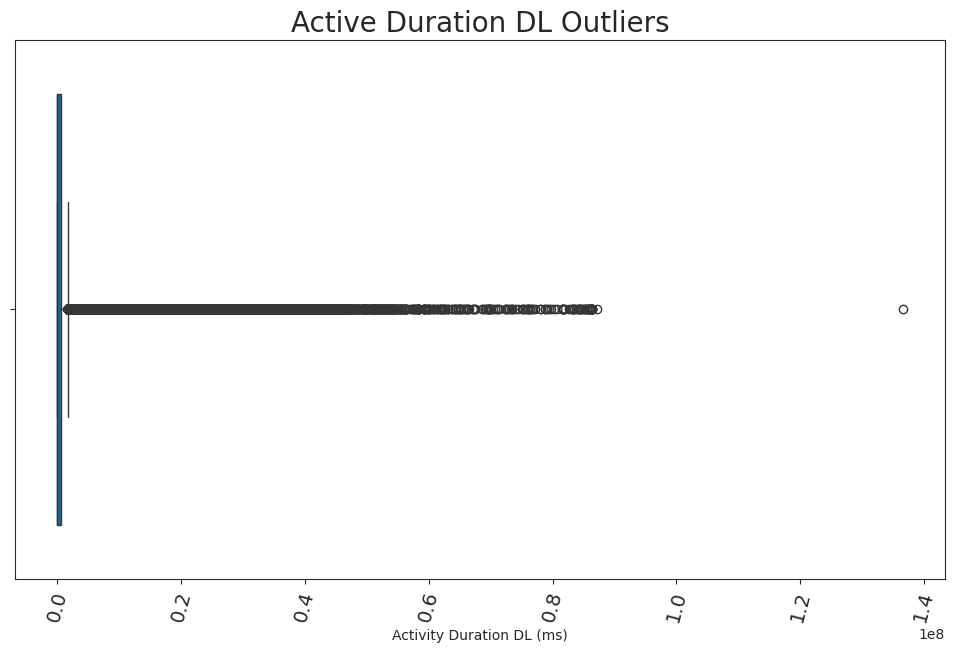

In [39]:
pltotter.box(df_clean, 'Activity Duration UL (ms)', 'Active Duration UL Outliers')
pltotter.box(df_clean, 'Activity Duration DL (ms)', 'Active Duration DL Outliers')

In [40]:
df_clean = df_cleaner.fix_outliers(df_clean)

2024-04-27 13:06:42,002:logger:Fix outliers
2024-04-27 13:06:42,008:logger:Fix outliers
2024-04-27 13:06:42,012:logger:Fix outliers
2024-04-27 13:06:42,016:logger:Fix outliers
2024-04-27 13:06:42,021:logger:Fix outliers
2024-04-27 13:06:42,027:logger:Fix outliers
2024-04-27 13:06:42,033:logger:Fix outliers
2024-04-27 13:06:42,039:logger:Fix outliers
2024-04-27 13:06:42,045:logger:Fix outliers
2024-04-27 13:06:42,051:logger:Fix outliers
2024-04-27 13:06:42,058:logger:Fix outliers
2024-04-27 13:06:42,064:logger:Fix outliers
2024-04-27 13:06:42,069:logger:Fix outliers
2024-04-27 13:06:42,074:logger:Fix outliers
2024-04-27 13:06:42,080:logger:Fix outliers
2024-04-27 13:06:42,084:logger:Fix outliers
2024-04-27 13:06:42,087:logger:Fix outliers
2024-04-27 13:06:42,092:logger:Fix outliers
2024-04-27 13:06:42,097:logger:Fix outliers
2024-04-27 13:06:42,103:logger:Fix outliers
2024-04-27 13:06:42,108:logger:Fix outliers
2024-04-27 13:06:42,113:logger:Fix outliers
2024-04-27 13:06:42,119:logger:F

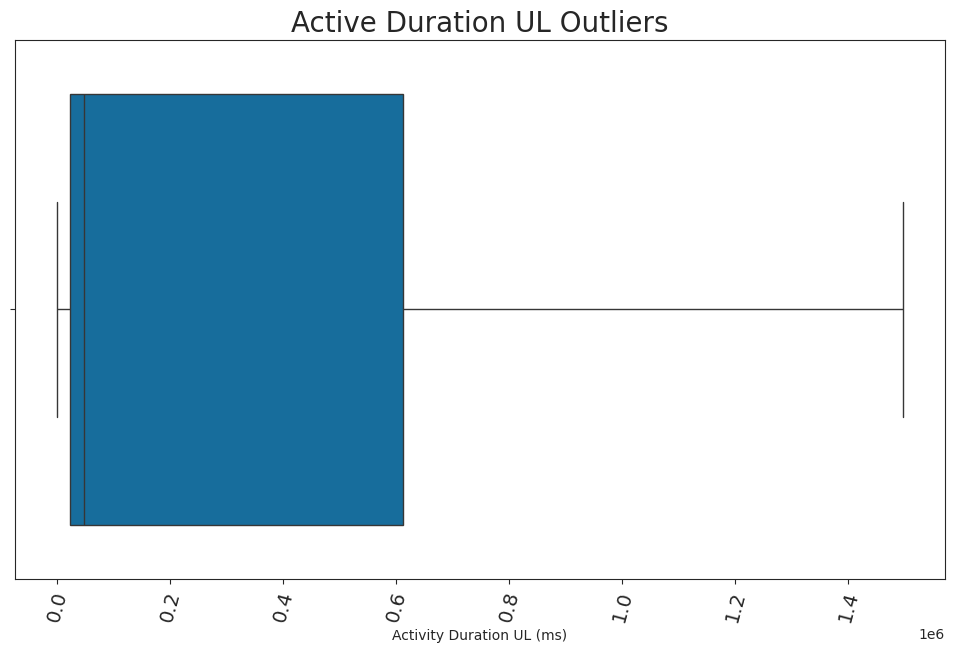

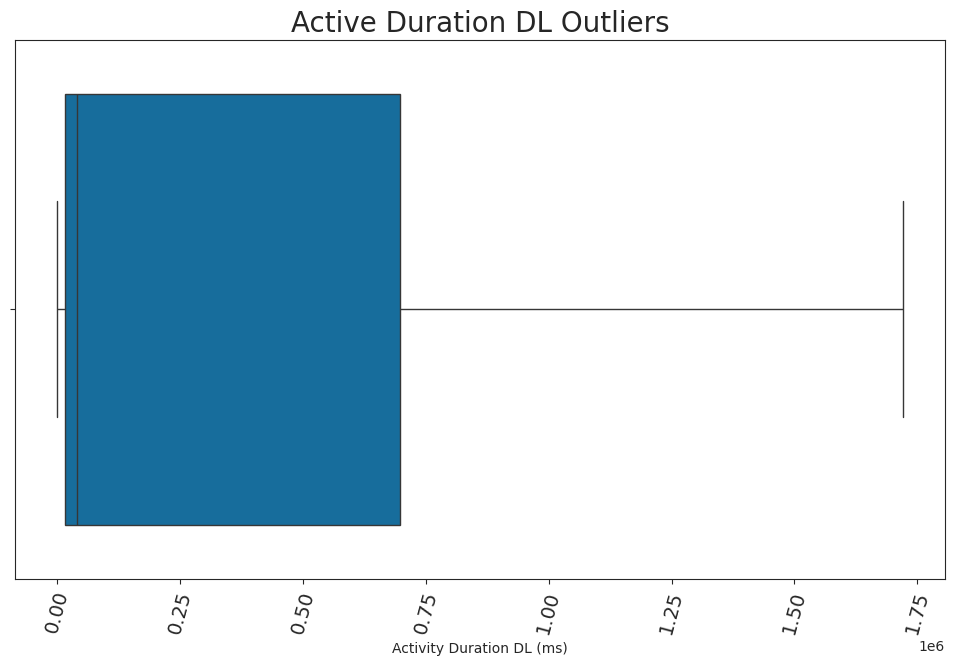

In [41]:
pltotter.box(df_clean, 'Activity Duration UL (ms)', 'Active Duration UL Outliers')
pltotter.box(df_clean, 'Activity Duration DL (ms)', 'Active Duration DL Outliers')

In [42]:

df_clean['Social Media Data Volume (Bytes)'] = df_clean['Social Media UL (Bytes)'] + df_clean['Social Media DL (Bytes)']
df_clean['Google Data Volume (Bytes)'] = df_clean['Google UL (Bytes)'] + df_clean['Google DL (Bytes)']
df_clean['Email Data Volume (Bytes)'] = df_clean['Email UL (Bytes)'] + df_clean['Email DL (Bytes)']
df_clean['Youtube Data Volume (Bytes)'] = df_clean['Youtube UL (Bytes)'] + df_clean['Youtube DL (Bytes)']
df_clean['Netflix Data Volume (Bytes)'] = df_clean['Netflix UL (Bytes)'] + df_clean['Netflix DL (Bytes)']
df_clean['Gaming Data Volume (Bytes)'] = df_clean['Gaming UL (Bytes)'] + df_clean['Gaming DL (Bytes)']
df_clean['Other Data Volume (Bytes)'] = df_clean['Other UL (Bytes)'] + df_clean['Other DL (Bytes)']
df_clean['Total Data Volume (Bytes)'] = df_clean['Total UL (Bytes)'] + df_clean['Total DL (Bytes)']

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146887 entries, 0 to 149995
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Bearer Id                         146887 non-null  int64         
 1   Start                             146887 non-null  datetime64[ns]
 2   Start ms                          146887 non-null  float64       
 3   End                               146887 non-null  datetime64[ns]
 4   End ms                            146887 non-null  float64       
 5   Dur. (ms)                         146887 non-null  float64       
 6   IMSI                              146887 non-null  int64         
 7   MSISDN/Number                     146887 non-null  int64         
 8   IMEI                              146887 non-null  int64         
 9   Last Location Name                146887 non-null  string        
 10  Avg RTT DL (ms)                   146

In [46]:

# Specify the file path and name for the CSV file
df_clean.to_csv('../data/cleaned_data.csv')

